# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [4]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [5]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

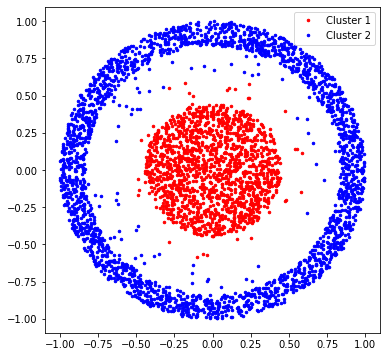

In [6]:
# Uncomment following two line and choose proper parameters
# begin answer
# end answer

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph

k_in_knn_graph = 120 
threshold = 0.2 
W = knn_graph(X, k_in_knn_graph, threshold)

# implement spectral in spectral
from spectral import spectral

idx = spectral(W, 2)
cluster_plot(X, idx)

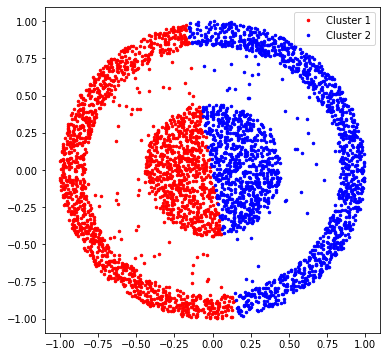

In [7]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [8]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)

In [11]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo

from spectral import spectral
from kmeans import kmeans

N = 10
k = 10 

avg_acc_s = 0
avg_mi_s = 0
avg_acc_k = 0
avg_mi_k = 0

for i in range(N):
    W = constructW(fea, k=k).toarray()
    idx_s = bestMap(gnd,  spectral(W, np.unique(gnd).shape[0]))
    avg_acc_s +=  np.sum(gnd == idx_s) / fea.shape[0]
    avg_mi_s +=  MutualInfo(gnd, idx_s)

    idx_k = bestMap(gnd, kmeans(x=fea.toarray(), k=np.unique(gnd).shape[0]))
    avg_acc_k +=  np.sum(gnd == idx_k) / fea.shape[0]
    avg_mi_k += MutualInfo(gnd, idx_k)

print('spectral clustering', 'acc:', avg_acc_s / N, 'mutual_info:', avg_mi_s / N)
print('k-means clustering', 'acc:', avg_acc_k / N, 'mutual_info:', avg_mi_k / N)


spectral clustering acc: 0.6548142532221378 mutual_info: 0.5889851335233415
k-means clustering acc: 0.533737680060652 mutual_info: 0.38418934964584395
